# KMeans

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

1-1.preprocessing

In [109]:
ds = pd.read_csv('customers.csv')
ds = ds.iloc[:,1:]
ds['Gender'].replace('Male',0,inplace=True)
ds['Gender'].replace('Female',1,inplace=True)
ds = ds.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score','Gender':'gender','Age':'age'})
X = np.nan_to_num(ds)

1-2.feature matrix (X)

In [110]:
X1 = StandardScaler().fit_transform(X)
X1

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

1-3.Model

In [111]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=12).fit(X1)
labels = kmeans.labels_
label_set = set(labels)
label_set,labels

({0, 1, 2, 3, 4},
 array([2, 2, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 2,
        3, 2, 3, 2, 3, 2, 3, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0,
        3, 0, 3, 0, 0, 3, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 1, 2, 3, 3, 1, 2,
        3, 3, 2, 0, 1, 3, 3, 3, 1, 2, 3, 2, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0,
        0, 3, 3, 2, 1, 3, 0, 2, 3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 1, 1, 1,
        1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 4, 2, 1, 2, 4, 2,
        0, 0, 4, 0, 4, 2, 4, 0, 4, 2, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4, 0,
        4, 0, 4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 0,
        4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
        4, 2], dtype=int32))

,gender,age,income,score,label_kmeans
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,0
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,4
197,0,32,126,74,2
198,0,32,137,18,4


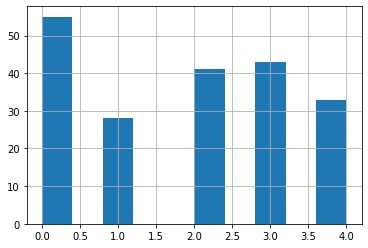

In [112]:
ds['label_kmeans']=labels
ds['label_kmeans'].hist()
ds

In [113]:
ds.groupby(ds['label_kmeans']).mean()

,gender,age,income,score
label_kmeans,,,,
0,1.000000,28.345455,60.800000,68.654545
1,0.000000,57.214286,46.785714,38.714286
2,0.000000,28.536585,61.804878,71.097561
3,1.000000,48.720930,46.186047,39.674419
4,0.424242,40.727273,89.030303,16.939394


# DBSCAN

In [114]:
from sklearn.cluster import DBSCAN 
eps = 0.8
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X1)
ds['label_dbscan'] = dbscan.labels_
labels = dbscan.labels_
labels

array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0,  2, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  3,  1,  1,  2,  3, -1,  3,  2,  3,  1,  1,  2,  1,
        4,  3,  2,  1,  4,  3,  1,  1,  2,  3,  2,  1,  4,  3,  2,  3,  4,
        1,  4,  1,  2,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  1,  4,  3,
        2,  3,  2,  3,  4,  1,  2,  3, -1,  3,  4,  1,  2,  1,  4,  3,  4,
        3,  4,  1,  4,  1, -1,  1, -1,  1, -1, -1, -1, -1])

<AxesSubplot:>

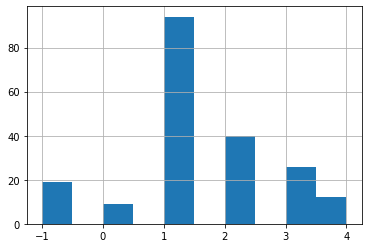

In [115]:
ds['label_dbscan'].hist()

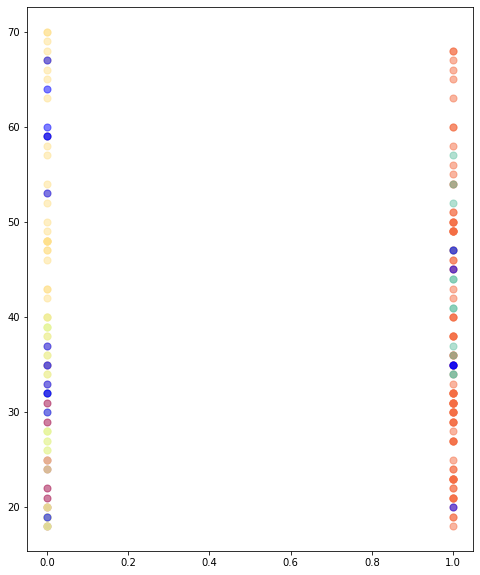

In [116]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1,1,1)


colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
for k, col in zip(set(labels),colors):
    if k == -1:
        col = 'b'
    subset = (labels == k)
    ax.scatter(X[subset,0], X[subset,1], s=50, c=[col], marker=u'o', alpha=0.5)

plt.show()

# Hierarchical

In [117]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [118]:
feature_mtx = ds.iloc[:,:-1]
X2 = MinMaxScaler().fit_transform(feature_mtx.values)
X2

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.5       ],
       [0.        , 0.05769231, 0.        , 0.81632653, 0.5       ],
       [1.        , 0.03846154, 0.00819672, 0.05102041, 0.75      ],
       [1.        , 0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [1.        , 0.25      , 0.01639344, 0.39795918, 0.75      ],
       [1.        , 0.07692308, 0.01639344, 0.76530612, 0.        ],
       [1.        , 0.32692308, 0.02459016, 0.05102041, 0.75      ],
       [1.        , 0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.        , 0.88461538, 0.03278689, 0.02040816, 0.25      ],
       [1.        , 0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.        , 0.94230769, 0.03278689, 0.13265306, 0.25      ],
       [1.        , 0.32692308, 0.03278689, 1.        , 0.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714, 0.75      ],
       [1.        , 0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.        , 0.36538462, 0.

In [119]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(X2,X2)
distances

array([[0.        , 0.43029381, 1.08458622, ..., 1.00888686, 1.16551206,
        1.11639204],
       [0.43029381, 0.        , 1.28399006, ..., 0.93683095, 1.30691003,
        1.01507247],
       [1.08458622, 1.28399006, 0.        , ..., 1.55247351, 1.4541052 ,
        1.6433207 ],
       ...,
       [1.00888686, 0.93683095, 1.55247351, ..., 0.        , 0.76463073,
        0.13432353],
       [1.16551206, 1.30691003, 1.4541052 , ..., 0.76463073, 0.        ,
        0.83150475],
       [1.11639204, 1.01507247, 1.6433207 , ..., 0.13432353, 0.83150475,
        0.        ]])

In [120]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(distances)
ds['label_hierarchy'] = agglom.labels_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:541: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


<AxesSubplot:>

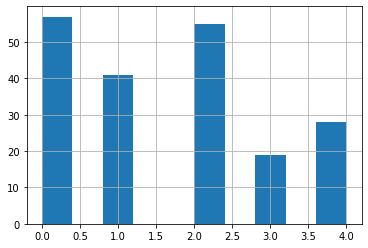

In [121]:
ds['label_hierarchy'].hist()

In [122]:
ds

,gender,age,income,score,label_kmeans,label_dbscan,label_hierarchy
0,0,19,15,39,2,-1,1
1,0,21,15,81,2,0,1
2,1,20,16,6,3,-1,0
3,1,23,16,77,0,1,2
4,1,31,17,40,3,1,0
...,...,...,...,...,...,...,...
195,1,35,120,79,0,1,2
196,1,45,126,28,4,-1,0
197,0,32,126,74,2,-1,1
198,0,32,137,18,4,-1,3
